<a href="https://colab.research.google.com/github/malick08012/Student-Score-Prediction/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


**Import Required Libraries**





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Load The Dataset**

In [4]:
df=pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Basic Data Understanding**

In [5]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Required Columns Only**

In [6]:
df = df[["Hours_Studied", "Exam_Score"]]
df.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


**Visualization**

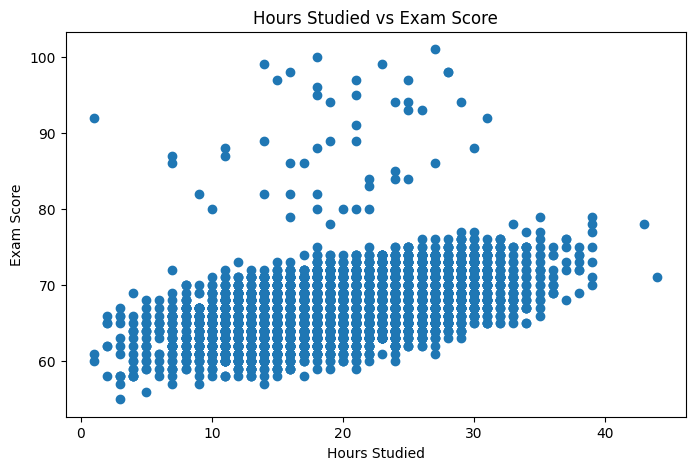

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

**Train/Test Split**

In [8]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Linear Regression Model**

In [9]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make Predictions**

In [10]:
y_pred = model.predict(X_test)

**Defining Mean Absolute Error**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Evaluate Model**

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2.4475687452945643
RMSE: 3.294832513010839
R2 Score: 0.2319868674542106


**Coclusion:**

The linear regression model shows a positive relationship between hours studied and exam score. However, the R² score of 0.23 indicates that study hours alone explain only 23% of the variation in exam performance. This suggests that other academic and personal factors also significantly influence exam outcomes.

**Bonus Task**

**Polynomial Regression**

Import Polynomial Features

In [13]:
from sklearn.preprocessing import PolynomialFeatures

**Create Polynomial Features (Degree 2)**

We will try degree = 2 (quadratic curve).

Explanation:

Now model becomes:

Exam_Score = a(Hours) + b(Hours²) + c

In [14]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

**Train Polynomial Regression Model**

In [15]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

**Make Predictions**

In [16]:
y_pred_poly = poly_model.predict(X_test_poly)

**Evaluate Polynomial Model**

In [17]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R2 Score:", r2_poly)

Polynomial Regression Results
MAE: 2.4447795821288105
RMSE: 3.2931729586684346
R2 Score: 0.23276034442853466


**Results:**

Linear R² → 0.2319
Polynomial R² → 0.2327

Difference = almost nothing

Polynomial regression did NOT significantly improve performance.

That tells us:

The relationship between Hours_Studied and Exam_Score is mostly linear.

There is no strong curve pattern.

The main limitation is not model type — it's missing important features.

**Visualizing Polynomial Regression Curve**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


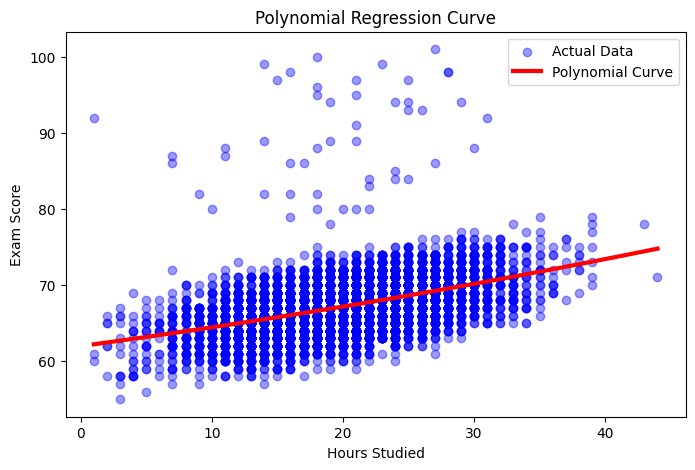

In [18]:
import numpy as np

# Create smooth range of study hours
X_range = np.linspace(df['Hours_Studied'].min(),
                      df['Hours_Studied'].max(),
                      100).reshape(-1, 1)

# Transform to polynomial features
X_range_poly = poly.transform(X_range)

# Predict using polynomial model
y_range_pred = poly_model.predict(X_range_poly)

# Plot
plt.figure(figsize=(8,5))

# Original data points
plt.scatter(df['Hours_Studied'], df['Exam_Score'],
            color='blue', alpha=0.4, label='Actual Data')

# Polynomial curve
plt.plot(X_range, y_range_pred,
         color='red', linewidth=3, label='Polynomial Curve')

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Curve")
plt.legend()
plt.show()

**Experiment With Diffrent Feature**

Reload Dataset

In [20]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Choosing a Strong Feature ( Previous_Scores )**

In [21]:
# Selecting two features now
X_multi = df[['Hours_Studied', 'Previous_Scores']]
y = df['Exam_Score']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

**Train Linear Regression Again**

In [22]:
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

LinearRegression()

**Make Predictions**

In [23]:
y_pred_multi = multi_model.predict(X_test_m)

**Evaluate New Model**

In [24]:
mae_multi = mean_absolute_error(y_test_m, y_pred_multi)
mse_multi = mean_squared_error(y_test_m, y_pred_multi)
rmse_multi = mse_multi ** 0.5
r2_multi = r2_score(y_test_m, y_pred_multi)

print("Multiple Linear Regression Results")
print("MAE:", mae_multi)
print("RMSE:", rmse_multi)
print("R2 Score:", r2_multi)

Multiple Linear Regression Results
MAE: 2.4073402148011462
RMSE: 3.2471169626907925
R2 Score: 0.254070427336487


**Conclusion**

Adding Previous_Scores as an additional feature slightly improved model performance, increasing the R² score from 0.23 to 0.25. However, the improvement was modest, indicating that exam performance is influenced by multiple interacting factors rather than just study hours or previous scores alone. This highlights the importance of feature selection in regression modeling.